In [22]:
import pickle
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
import numpy as np

In [2]:
with open('random_forest.pkl','rb') as file:
    model = pickle.load(file)

In [4]:
df = pd.read_csv("TobeBalanced1.csv")

In [5]:
df.head()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Credit_Amount,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Age_Days,ID_Days,Mobile_Tag,Client_Family_Members,Client_Permanent_Match_Tag,Default
0,-0.884196,0.0,0.0,1.0,0.0,0.029027,1,0,0,0,0,0,-0.305765,-1.518676,1,2.0,1,0
1,0.294966,1.0,0.0,1.0,0.0,-1.127548,0,1,0,0,0,0,-0.265722,-1.742995,1,2.0,1,0
2,0.098439,0.0,0.0,1.0,0.0,-0.012874,0,99,3,0,0,1,0.247612,-1.550898,1,2.0,1,0
3,-0.098088,0.0,0.0,1.0,1.0,-0.155390,2,0,0,0,0,0,1.498715,-1.275766,1,2.0,1,0
4,1.474129,1.0,0.0,1.0,0.0,1.863023,1,0,0,1,0,0,-0.811871,0.749307,1,4.0,1,0


In [6]:
x = df.drop('Default',axis=1)
y = df['Default']

In [7]:
y.value_counts()

,count
Default,
0,106495
1,9372


In [8]:
rus = RandomUnderSampler(random_state=42)
x_resampled, y_resampled = rus.fit_resample(x, y)

In [9]:
y_resampled.value_counts()

,count
Default,
0,9372
1,9372


In [10]:
x_train,x_test,y_train,y_test = train_test_split(x_resampled,y_resampled,test_size=0.2,random_state=42,stratify = y_resampled)

In [11]:
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, class_weight='balanced_subsample',
                       max_depth=10, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200, random_state=42)

In [12]:
model.score(x_train,y_train)

0.7413137712570856

In [13]:
model.score(x_test,y_test)

0.604694585222726

In [14]:
importances = model.feature_importances_
print(importances)

[0.09033131 0.02527424 0.01551178 0.01502643 0.01388473 0.16723366
 0.04934893 0.09681137 0.02112789 0.05588111 0.02429605 0.02202179
 0.19195715 0.15722656 0.         0.03212956 0.02193745]


In [15]:
importance_df = pd.DataFrame({'feature': x_train.columns, 'importance': importances})

In [16]:
#sort by importance
importance_df = importance_df.sort_values('importance', ascending=False)

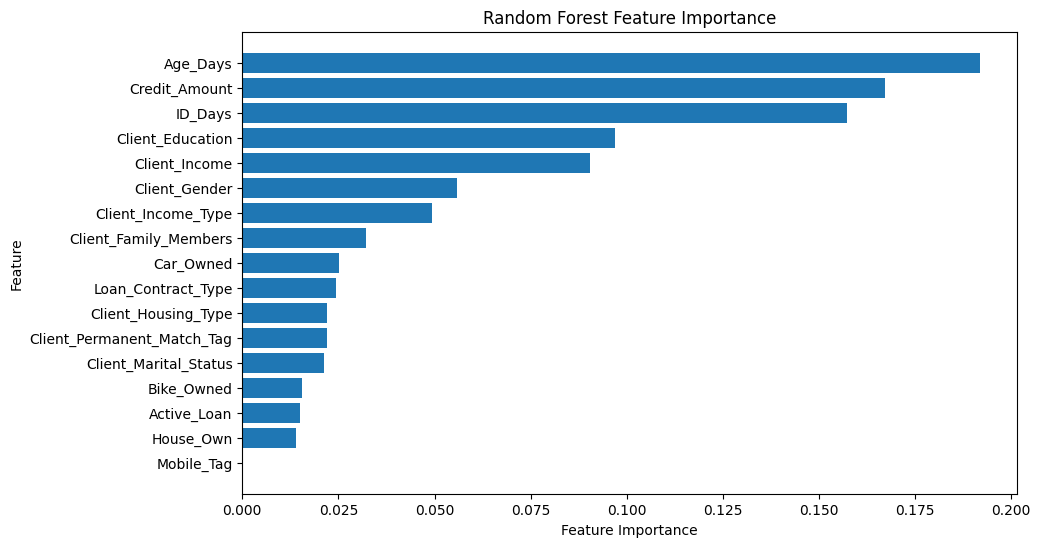

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'],importance_df['importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [25]:
from sklearn.inspection import permutation_importance,PartialDependenceDisplay

In [20]:
result = permutation_importance(model, x_test, y_test, n_repeats=10, random_state=42)

In [23]:
features = x_train.columns.values.tolist()
print(features)

['Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own', 'Credit_Amount', 'Client_Income_Type', 'Client_Education', 'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type', 'Age_Days', 'ID_Days', 'Mobile_Tag', 'Client_Family_Members', 'Client_Permanent_Match_Tag']


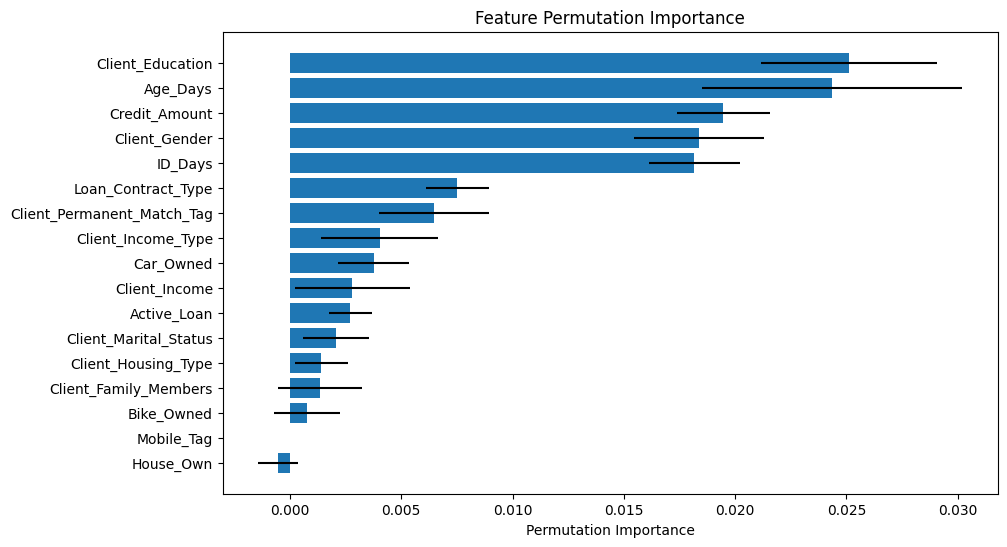

In [24]:
sorted_idx = result.importances_mean.argsort() #sort by importance
plt.figure(figsize=[10,6])

#create horizontal bar plot
plt.barh(np.array(features)[sorted_idx], result.importances_mean[sorted_idx], xerr=result.importances_std[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Permutation Importance")
plt.show()

In [39]:
top_features_indices = [12,5,13,7,0]
bottom_features_indices = [2,3,4,14]

In [35]:
features = df.columns.values.tolist()

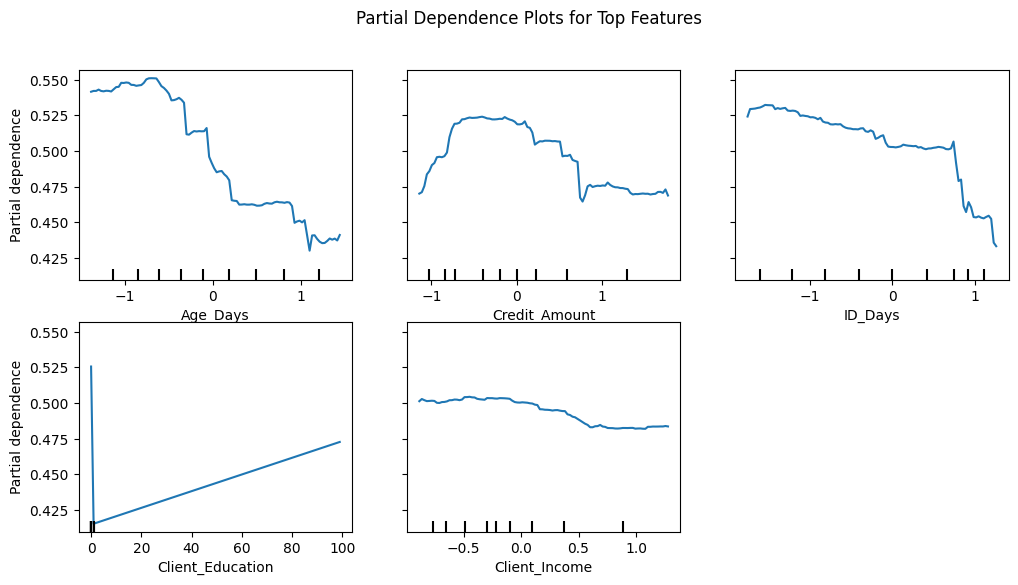

In [37]:
# Top features PDP
fig, ax = plt.subplots(figsize=(12, 6))
PartialDependenceDisplay.from_estimator(model, x_test, features=top_features_indices,
                                        feature_names=features, ax=ax)
plt.suptitle("Partial Dependence Plots for Top Features")
plt.show()

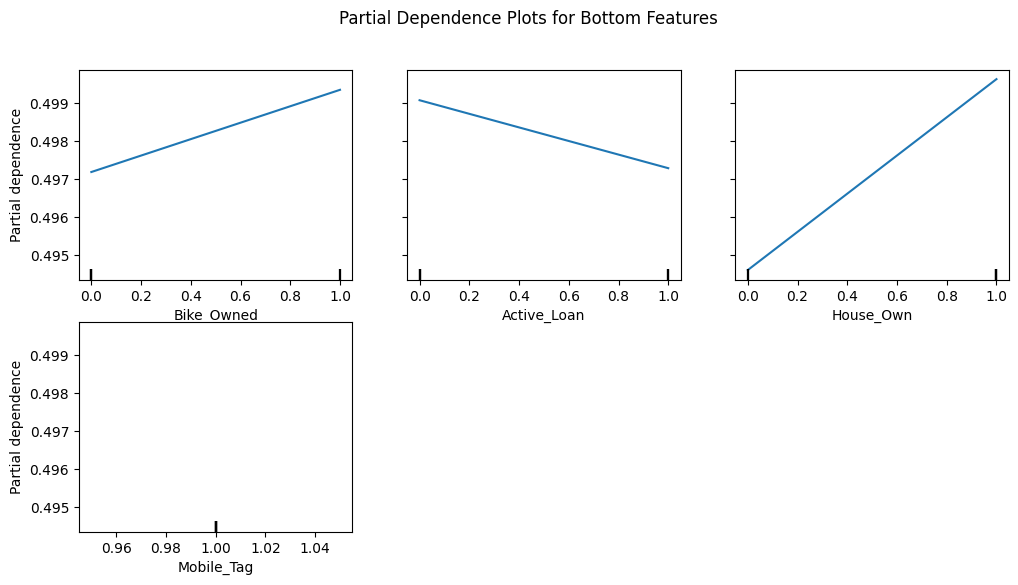

In [40]:
fig, ax = plt.subplots(figsize=(12, 6))
PartialDependenceDisplay.from_estimator(model, x_test, features=bottom_features_indices,
                                        feature_names=features, ax=ax)
plt.suptitle("Partial Dependence Plots for Bottom Features")
plt.show()